[-0.39260779]


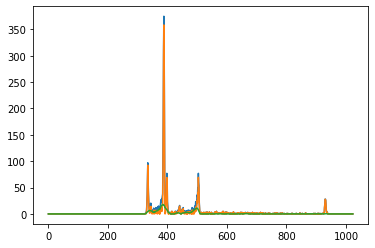

In [13]:
from matplotlib import pyplot as plt
import ROOT
import numpy as np
from array import array

#ba133=#[41,46,68,74,78,79,74,67,81,83,68,78,72,55,59,62,47,44,63,58,53,59,49,49,53,50,52,53,50,50,47,41,45,45,50,46,40,42,41,33,36,45,34,27,35,36,40,30,35,27,27,50,53,48,43,61,84,251,2399,114172,78265,38,31,29,32,42,97,33987,157,6764,39,27,28,29,33,20,27,36,21,33,25,23,33,34,45,34,30,41,34,37,24,26,34,40,27,40,59,68,73,98,175,343,1106,2410,33,25,27,23,23,30,21,16,19,19,23,24,19,27,65,835,25,27,33,16,24,28,39,628,82,113,25,20,19,23,20,45,32,65,73,71,491,732,731,815,910,941,1041,1211,1361,1569,1761,2067,2625,3328,5113,5027,9227,17082,25,35,27,30,55,54,23,20,14,24,19,19,29,22,17,18,21,15,25,20,19,19,18,23,17,26,14,14,11,20,12,22,18,18,16,17,11,18,14,22,21,21]
f=ROOT.TFile('expspec.root')
h=f.Get("hexp")
ba133=[]
for i in range(0,h.GetNbinsX()):
    ba133.append(h.GetBinContent(i+1))
s=np.random.normal(0, 1, 1)
print(s)

def sub_bkg(spec):
    bkg=array('d',spec)
    s=ROOT.TSpectrum()
    nbins=len(spec)
    back_decreasing_window=1
    back_order_2=0
    back_smoothing=3
    num_interations=6
    s.Background(bkg, nbins, num_interations, back_decreasing_window, 
            back_order_2, False, back_smoothing, False)
    bkgsub=np.array(spec)-np.array(bkg)
    return bkg,  bkgsub.tolist()

b,spc,  s=sub_bkg(ba133)
plt.plot(spc)
plt.plot(s)
plt.plot(b)
plt.show()


In [11]:
sub_bkg



#x_full=[start+i*num_summed+0.5*num_summed for i in range(0,len(spec))]
#    nbins=len(subspec)
from array import array
from matplotlib import pyplot as plt
import ROOT
import numpy as np

#num_found=s.

4
387.99999875609353
334.01661073467255
504.20741960391985
398.0000120920222


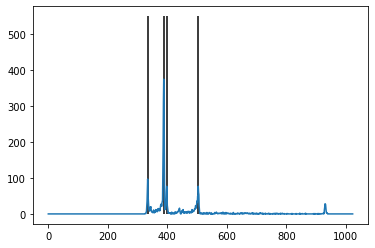

In [14]:

#ba133=[41,46,68,74,78,79,74,67,81,83,68,78,72,55,59,62,47,44,63,58,53,59,49,49,53,50,52,53,50,50,47,41,45,45,50,46,40,42,41,33,36,45,34,27,35,36,40,30,35,27,27,50,53,48,43,61,84,251,2399,114172,78265,38,31,29,32,42,97,33987,157,6764,39,27,28,29,33,20,27,36,21,33,25,23,33,34,45,34,30,41,34,37,24,26,34,40,27,40,59,68,73,98,175,343,1106,2410,33,25,27,23,23,30,21,16,19,19,23,24,19,27,65,835,25,27,33,16,24,28,39,628,82,113,25,20,19,23,20,45,32,65,73,71,491,732,731,815,910,941,1041,1211,1361,1569,1761,2067,2625,3328,5113,5027,9227,17082,25,35,27,30,55,54,23,20,14,24,19,19,29,22,17,18,21,15,25,20,19,19,18,23,17,26,14,14,11,20,12,22,18,18,16,17,11,18,14,22,21,21]

f=ROOT.TFile('expspec.root')
h=f.Get("hexp")
ba133=[]
for i in range(0,h.GetNbinsX()):
    ba133.append(h.GetBinContent(i+1))
sigma=2
nbins=len(ba133)
threshold=sum(ba133)/nbins*0.05
#print(threshold)

y=array('d',ba133)
des=array('d',[0]*nbins)
s=ROOT.TSpectrum()
num_found=s.SearchHighRes(y, des,nbins,2, 10,1, 1000,1,3)
xpeaks=s.GetPositionX()
xp=[]
print(num_found)
for i in range(0,num_found):
    print(xpeaks[i])
    xp.append(xpeaks[i])
plt.plot(ba133)
plt.vlines(xp,0, 550)

 
    
    